# Submission Guidelines:
### Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission. Each group of students (mostly pairs, with some approved exceptions) should submit a Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.ipynb.

# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [6]:
import pandas as pd
path = 'bank-full_2016.csv'
df = pd.read_csv(path)

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [24]:
print("\033[34mThe table's dimension is:\033[0m\n",df.ndim)
print("\033[34mThe different attributes in it:\033[0m\n",df.columns)
print("\033[34mThe frequency table of the \"outcome\" category in the table:\033[0m\n",df['outcome'].value_counts())
print("\033[34mThe first 5 rows of the table:\033[0m\n")
display(df.head())


The table's dimension is:
 2
The different attributes in it:
 Index(['age', 'job', 'marital', 'education', 'default_credit', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'days_from_last_contact', 'previous_campaign_contacts',
       'previous_campaign_outcome', 'outcome', 'isContactKnown'],
      dtype='object')
The frequency table of the "outcome" category in the table:
 no     39922
yes     5289
Name: outcome, dtype: int64
The first 5 rows of the table:



,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False


3) What is the data type of each attribute in the table?

In [19]:
print("\033[34mThe data type of each attribute in the table:\033[0m\n",df.dtypes)

The data type of each attribute in the table:
 age                              int64
job                             object
marital                         object
education                       object
default_credit                  object
balance                          int64
housing_loan                    object
personal_loan                   object
contact                         object
day                              int64
month                           object
duration                         int64
campaign                      category
days_from_last_contact         float64
previous_campaign_contacts       int64
previous_campaign_outcome       object
outcome                         object
isContactKnown                    bool
dtype: object


## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [20]:
df['isContactKnown'] = df['contact'] != 'unknown'

2) Change the type of the 'campaign' attribute to Categorical data.

In [21]:
df['campaign'] = df['campaign'].astype('category')

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [25]:
print("\033[34mThe range of values for each attribute in the table? what are the mean, std, median values for each category?:\033[0m\n")
display(df.describe())

The range of values for each attribute in the table? what are the mean, std, median values for each category?:



,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

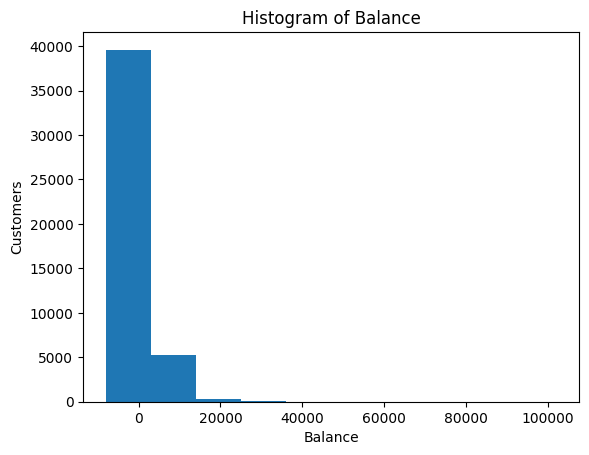

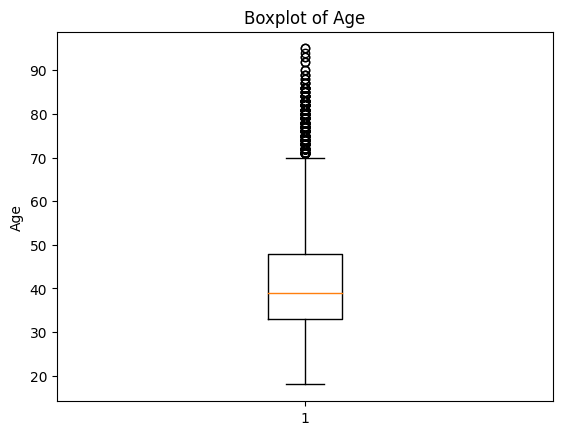

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['balance'])
plt.xlabel('Balance')
plt.ylabel('Customers')
plt.title('Histogram of Balance')
plt.show()


plt.boxplot(df['age'])
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

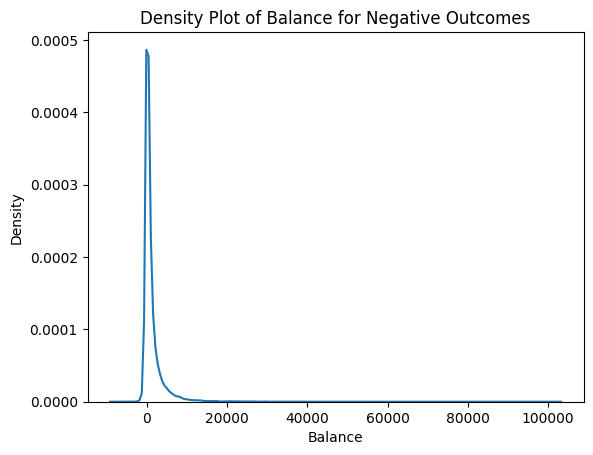

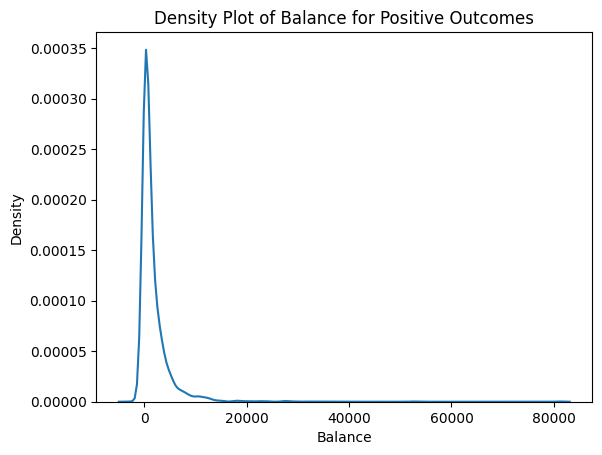

The difference is not in the balance, but in the density. The reason for this is that there are by far more customers with negative outcomes.


In [27]:
import seaborn as sns

negative_outcome = df[df['outcome'] == 'no']
positive_outcome = df[df['outcome'] == 'yes']

sns.kdeplot(negative_outcome['balance'])
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Density Plot of Balance for Negative Outcomes')
plt.show()

sns.kdeplot(positive_outcome['balance'])
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Density Plot of Balance for Positive Outcomes')
plt.show()

print("\033[34mThe difference is not in the balance, but in the density. The reason for this is that there are by far more customers with negative outcomes.\033[0m")

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [28]:
print(df.isnull().sum())

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
isContactKnown                    0
dtype: int64


2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [29]:
another_df = df[(df['contact'] != 'cellular') & (df['contact'] != 'telephone')]

3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [30]:
print(another_df)
print("\033[34mIt seems that whether these customers don't have a phone at all, or either the bank didn't contact them yey, because for the majority of them the phone is unknown or it is their first campaign.\033[0m")

       age            job  marital  education default_credit  balance  \
0       58     management  married   tertiary             no     2143   
1       44     technician   single  secondary             no       29   
2       33   entrepreneur  married  secondary             no        2   
3       47    blue-collar  married    unknown             no     1506   
4       33        unknown   single    unknown             no        1   
...    ...            ...      ...        ...            ...      ...   
45061   30  self-employed   single  secondary             no     1031   
45062   58        retired  married    primary             no      742   
45122   40   entrepreneur   single   tertiary             no      262   
45135   53    blue-collar  married    primary             no     1294   
45136   53  self-employed  married   tertiary             no      730   

      housing_loan personal_loan  contact  day month  duration campaign  \
0              yes            no  unknown    5  

## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

Frequency table for balance attribute:


(-8129.146, 7716.143]     43836
(7716.143, 23451.286]      1254
(23451.286, 39186.429]       92
(39186.429, 54921.571]       16
(54921.571, 70656.714]        8
(70656.714, 86391.857]        3
(86391.857, 102127.0]         2
Name: balance, dtype: int64

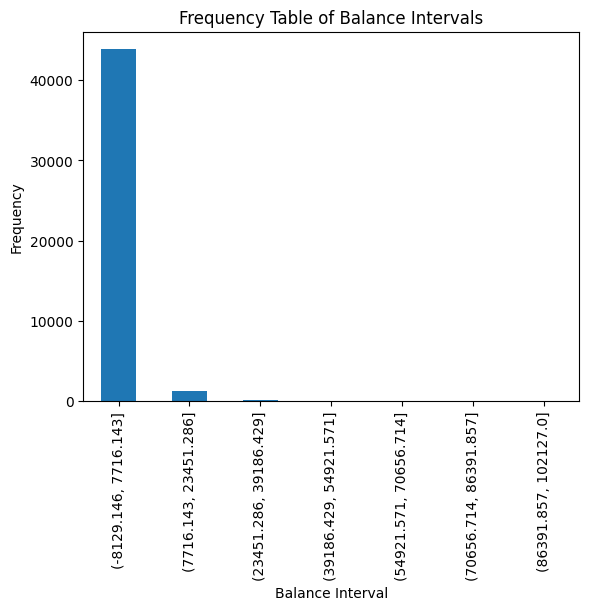

In [33]:
print("Frequency table for balance attribute:")
display(pd.cut(df["balance"], 7).value_counts(sort=False))
bar = pd.cut(df["balance"], 7).value_counts(sort=False).plot(kind='bar')

plt.xlabel('Balance Interval')
plt.ylabel('Frequency')
plt.title('Frequency Table of Balance Intervals')
plt.show()

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

Frequency table for age attribute:


(17.999, 31.0]    9026
(31.0, 35.0]      7881
(35.0, 39.0]      6455
(39.0, 45.0]      7401
(45.0, 52.0]      7040
(52.0, 95.0]      7408
Name: age, dtype: int64

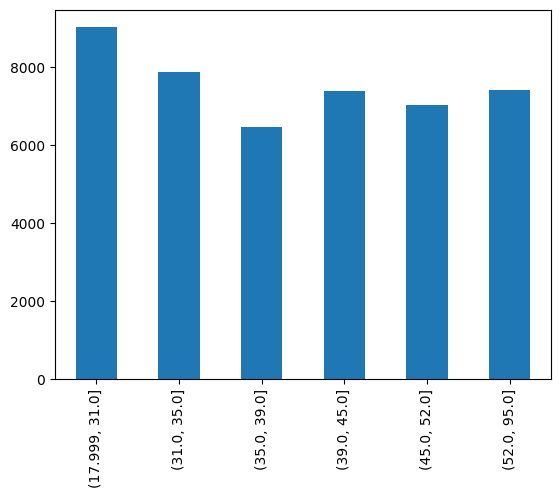

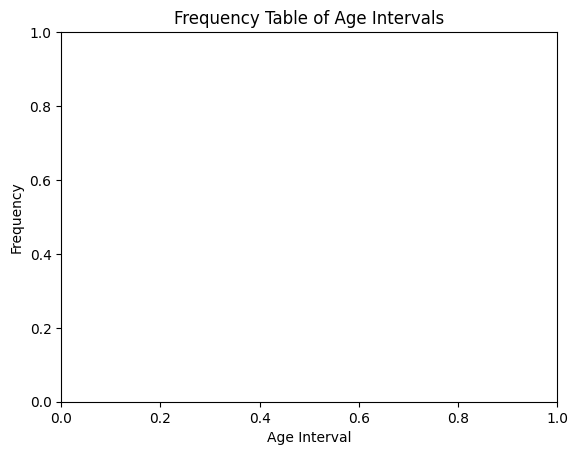

In [34]:
print("Frequency table for age attribute:")
display(pd.qcut(df["age"], 6).value_counts(sort=False))
barplot = pd.qcut(df["age"], 6).value_counts(sort=False).plot(kind='bar')
plt.show()
plt.xlabel('Age Interval')
plt.ylabel('Frequency')
plt.title('Frequency Table of Age Intervals')
plt.show()

3) Propose a way to further discretize the Month column.

print("We can partition the months into quarters of the year, such that Jan-March will be in quarter 1, Apr-Jun will be in the 2nd, Jul-Sep in the 3rd and Oct-Dec will be in the 4th quarter. It is a common method by banks, and maybe we can extract more valuable data using this method")

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [35]:
import scipy

pearson = df['age'].corr(df['balance'], method='pearson')
spearman = df['age'].corr(df['balance'], method='spearman')

print('"\033[34mPearson correlation:\033[0m', pearson)
print('"\033[34mSpearman correlation:\033[0m', spearman)


"Pearson correlation: 0.09778273937134754
"Spearman correlation: 0.096380304771986


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [37]:
# subset of the df with numeric columns
numeric_columns_df = df.select_dtypes(include='number')
corr_matrix = numeric_columns_df.corr(method='pearson')
print("\033[34mThe full pearson correlation matrix for all the numeric columns in the data:\033[0m\n")
display(corr_matrix)
# print(df.info())

The full pearson correlation matrix for all the numeric columns in the data:



,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [38]:
import numpy as np

entropies = []
for attr in df.select_dtypes(exclude=[object]).axes[1]:
    entropy = 0
    dict = {}
    for val in df[attr][~df[attr].isnull()]:
        if val in dict:
            entropy += - (dict.get(val))*np.log2(dict.get(val))
        else:
            dict[val] = len(df[df[attr] == val]) / len(df[attr])
            entropy += - dict[val]*np.log2(dict[val])

    entropies.append([attr, entropy])

print("\033[34mThe entropy of each of the attributes in the data:\033[0m\n",entropies)
biggest_entropy = max(entropies, key=lambda x: x[1])
print("\033[34mThe attribute with the biggest entropy is:\033[0m\n",biggest_entropy[0])


The entropy of each of the attributes in the data:
 [['age', 6490.000545756813], ['balance', 1209.9791947392016], ['day', 7830.950224693467], ['duration', 832.4707128752422], ['campaign', 19440.573886882645], ['days_from_last_contact', 73.01000056085482], ['previous_campaign_contacts', 10185.397328892786], ['isContactKnown', 17965.40389016442]]
The attribute with the biggest entropy is:
 campaign


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [39]:
import sklearn.metrics as metrices
#pre processing
df_num = df.select_dtypes('number')
columns = list(df_num.columns)
columns.append('outcome')
non_na = df.dropna(subset=columns)

#calc mutual information
mi = [metrices.mutual_info_score(non_na['outcome'], non_na[column]) for column in df_num.columns]
highest_mi = df_num.columns[np.nanargmax(mi)]
print("\033[34mThe attribute with the highest mutual information with 'outcome' attribute is:\033[0m\n",highest_mi)


The attribute with the highest mutual information with 'outcome' attribute is:
 balance


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

As we can see at the boxplot, the campaign column in the table does have many outliers.


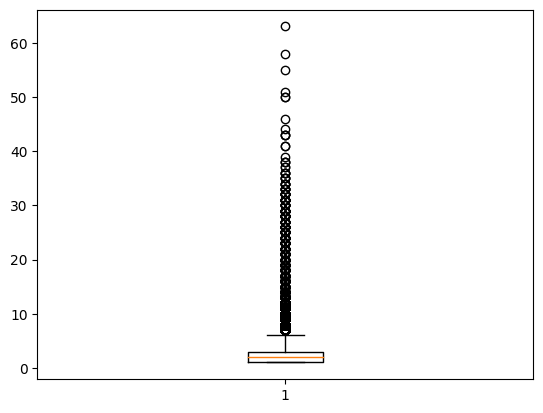

In [40]:
plt.boxplot(df['campaign'].dropna())
print("As we can see at the boxplot, the campaign column in the table does have many outliers.")

## Normalization - Bonus

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

The original plot


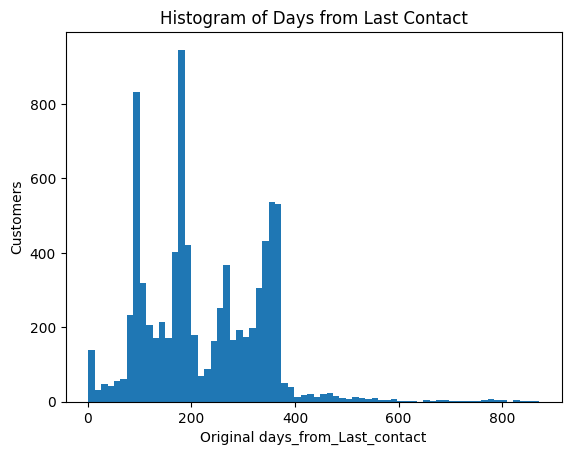


We can see that the distribution look like a normal one, with 3 peaks. Hence we chose to use the Z normalization.

The Z-Normalized plot - we can see it distributes normally around 0


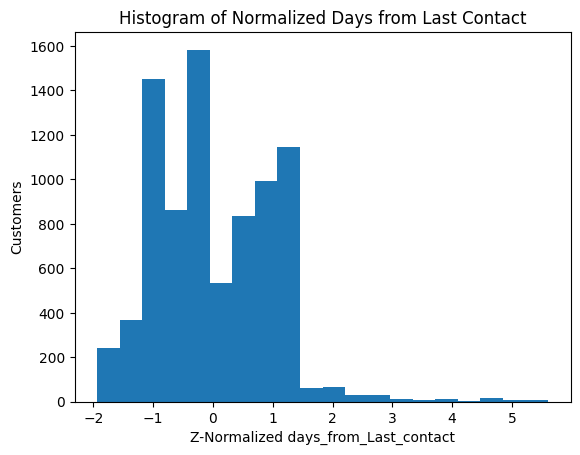

In [45]:
import matplotlib.pyplot as plt
import numpy as np

print("\033[34mThe original plot\033[0m")
plt.hist(df['days_from_last_contact'], bins=70)
plt.xlabel('Original days_from_Last_contact')
plt.ylabel('Customers')
plt.title('Histogram of Days from Last Contact')
plt.show()

print("\033[34m\nWe can see that the distribution look like a normal one, with 3 peaks. Hence we chose to use the Z normalization.\n\033[0m")

print("\033[34mThe Z-Normalized plot - we can see it distributes normally around 0\033[0m")
df['days_from_last_contact_norm'] = (df['days_from_last_contact'] - np.mean(df['days_from_last_contact'])) / np.std(df['days_from_last_contact'])
plt.hist(df['days_from_last_contact_norm'], bins=20)
plt.xlabel('Z-Normalized days_from_Last_contact')
plt.ylabel('Customers')
plt.title('Histogram of Normalized Days from Last Contact')
plt.show()